Random Forest Algorithm

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv("ercot-dataset.csv", sep=',')
# to change the float to two decimal places following code is used
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df)

                   Date  DryBulb  DewPnt  WetBulb  Humidity  ElecPrice  Day  \
0         1/1/2006 0:30    23.90   21.65    22.40     87.50      19.67    1   
1         1/1/2006 1:00    23.90   21.70    22.40     88.00      18.56    1   
2         1/1/2006 1:30    23.80   21.65    22.35     88.00      19.09    1   
3         1/1/2006 2:00    23.70   21.60    22.30     88.00      17.40    1   
4         1/1/2006 2:30    23.70   21.60    22.30     88.00      17.00    1   
...                 ...      ...     ...      ...       ...        ...  ...   
87643  31/12/2010 22:00    22.60   19.10    20.40     81.00      23.86   31   
87644  31/12/2010 22:30    22.45   19.05    20.30     81.50      26.49   31   
87645  31/12/2010 23:00    22.30   19.00    20.20     82.00      25.18   31   
87646  31/12/2010 23:30    22.05   19.05    20.15     83.50      26.19   31   
87647     1/1/2011 0:00    21.80   19.10    20.10     85.00      24.62    1   

       Month  Year  Minutes  SYSLoad  
0          1

In [15]:
# prints the high level information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       87648 non-null  object 
 1   DryBulb    87648 non-null  float64
 2   DewPnt     87648 non-null  float64
 3   WetBulb    87648 non-null  float64
 4   Humidity   87648 non-null  float64
 5   ElecPrice  87648 non-null  float64
 6   Day        87648 non-null  int64  
 7   Month      87648 non-null  int64  
 8   Year       87648 non-null  int64  
 9   Minutes    87648 non-null  int64  
 10  SYSLoad    87648 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 7.4+ MB


In [16]:
# gives additional statistical information
df.describe()

,DryBulb,DewPnt,WetBulb,Humidity,ElecPrice,Day,Month,Year,Minutes,SYSLoad
count,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00
mean,18.26,11.92,14.88,68.90,42.40,15.73,6.52,2008.00,705.00,8894.00
std,4.89,5.47,4.29,16.86,215.64,8.80,3.45,1.41,415.60,1409.05
min,3.70,-8.40,2.50,7.00,-264.31,1.00,1.00,2006.00,0.00,5498.36
25%,14.70,8.00,11.60,58.00,21.80,8.00,4.00,2007.00,352.50,7879.67
50%,18.50,12.45,15.10,70.00,25.81,16.00,7.00,2008.00,705.00,8992.58
75%,21.80,16.35,18.40,82.50,36.94,23.00,10.00,2009.00,1057.50,9832.85
max,43.80,24.20,26.30,100.00,10000.00,31.00,12.00,2011.00,1410.00,14274.15


In [17]:
# to check the total missing data on each features
# zero indicates there is no missing data values
df.isnull().sum()
df1 = df.drop(['Date'], axis=1)

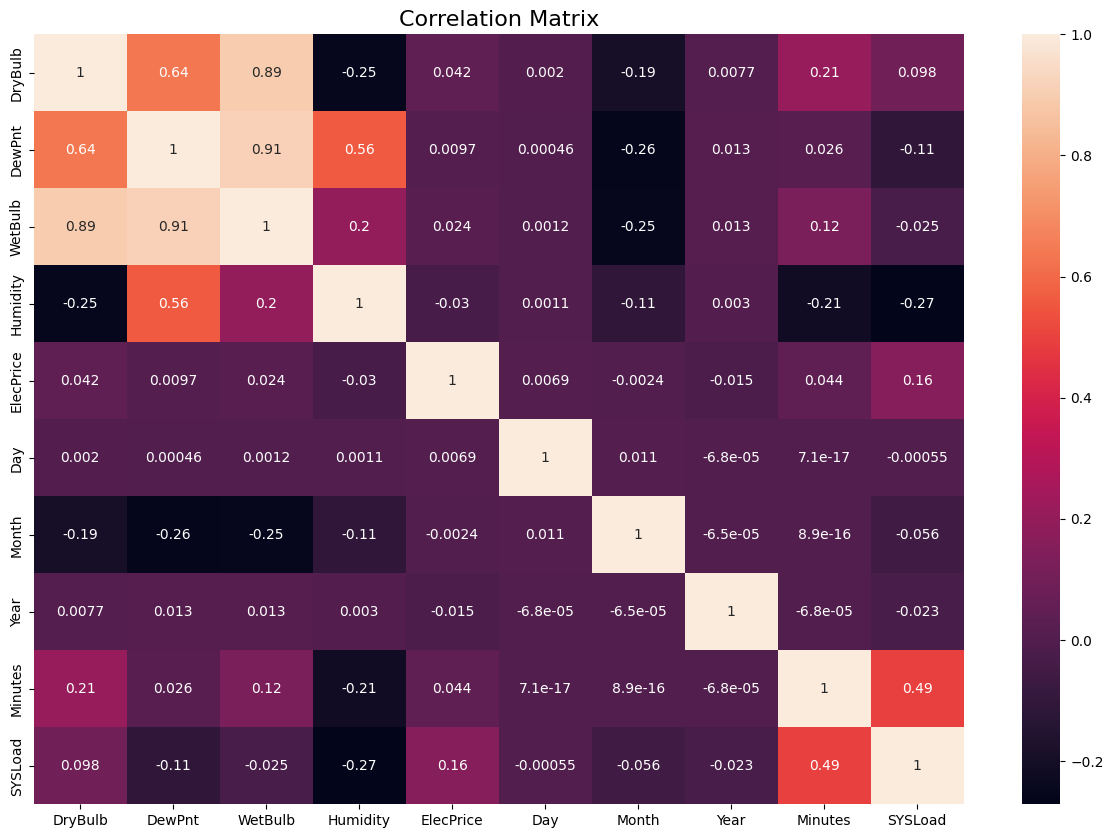

In [18]:
df1.corr()
# to see the correlation between features
# this helps to see how one parameters has effects on others
# lets see the plot of correlation data
sns.heatmap(df1.corr(), annot= True)
plt.rcParams["figure.figsize"]=(15,10)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


Importing the required libraries

In [19]:
# import sklearn libraries modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# this will select all the rows and columns except the last one from df and assign to x variable
# df1 does not contain the date in the first column in string format
x = df1.iloc[:,:-1].values

# quality is taken target variable and it in last column and is assigned to y variable
y = df1.iloc[:,-1].values
print(len(x))
print(len(y))
# encoding the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
x = ct.fit_transform(x)

87648
87648


Splitting the dataset into the training and test set

In [20]:
# we will split the data into training and testing data using following code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

training the random forest regression model

In [21]:
# Creating a Random Forest Regression Model and Fitting it to the Training Data
regr = RandomForestRegressor(n_estimators=10, random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the test results

In [22]:
y_pred = regr.predict(x_test)

visualization of the Random forest regression results graphically

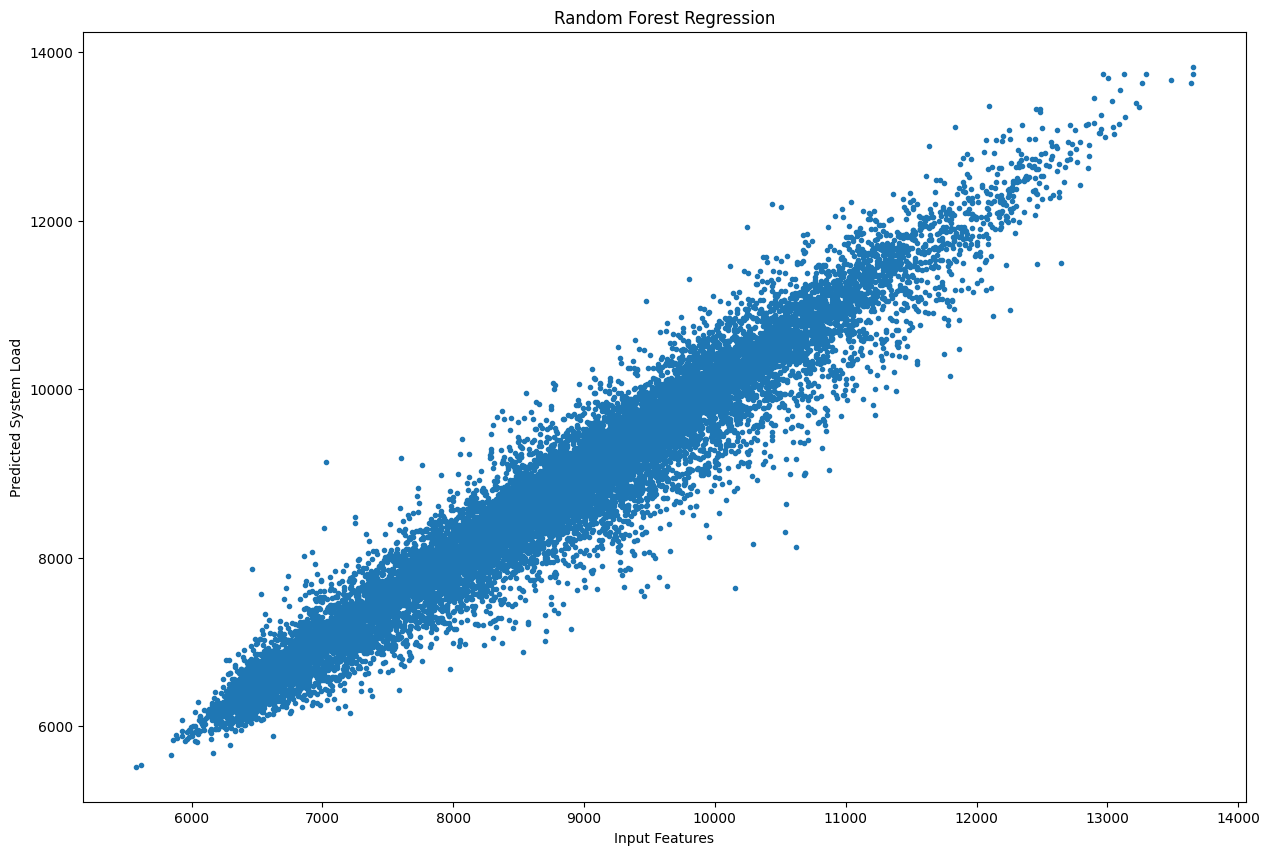

In [23]:
plt.plot(y_pred,y_test, '.')
#plt.plot(x_grid, regressor.predict(x_grid.reshape(-1,1)), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Actual Test value')
plt.ylabel('Predicted System Load')
plt.show()

Evaluating the model performance

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9412740904595178